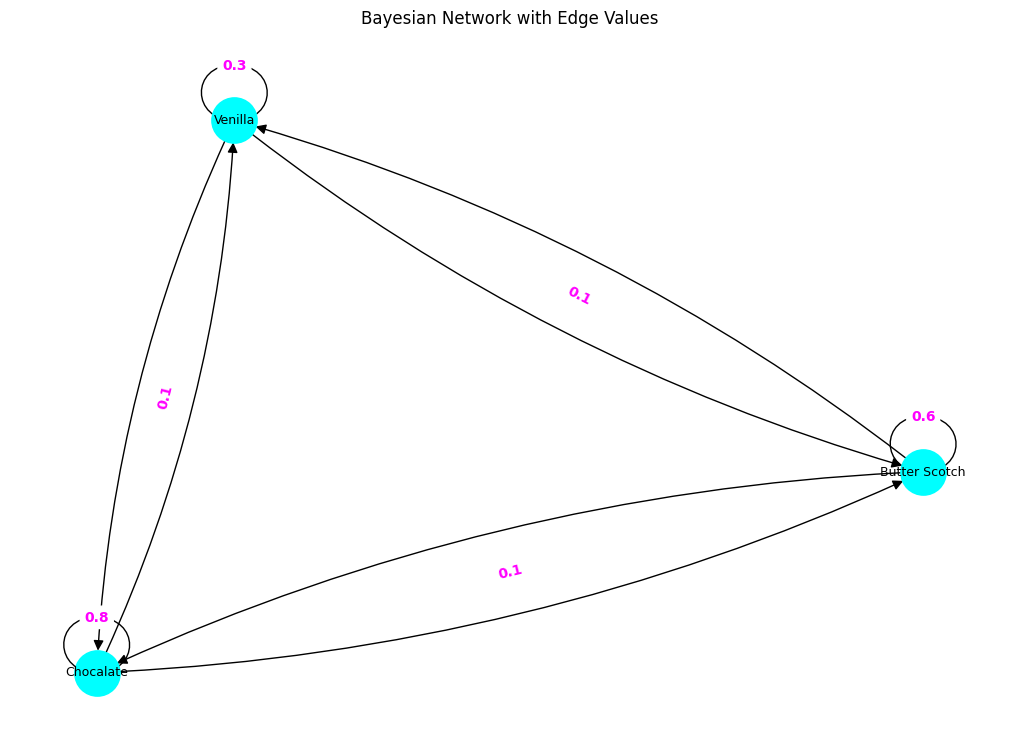

Transition Matrix:

               Venilla  Butter Scotch  Chocalate
Venilla            0.3            0.5        0.2
Butter Scotch      0.1            0.6        0.3
Chocalate          0.1            0.1        0.8

Initial State:
 [0.3  0.45 0.25]



Enter the number of days:  2



Day 1: Butter Scotch
Next State Probabilities:
  Probability of Venilla: 0.16
  Probability of Butter Scotch: 0.45
  Probability of Chocalate: 0.40

Day 2: Chocalate
Next State Probabilities:
  Probability of Venilla: 0.13
  Probability of Butter Scotch: 0.39
  Probability of Chocalate: 0.48

Day 2: Chocalate with probability 0.4815


In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create a Directed Graph to represent the Bayesian Network
G = nx.DiGraph()

# Add nodes (variables)
nodes = ['Venilla', 'Butter Scotch', 'Chocalate']
G.add_nodes_from(nodes)

# Add edges (dependencies)
edges = [
    ('Venilla', 'Butter Scotch'),
    ('Venilla', 'Chocalate'),
    ('Butter Scotch', 'Chocalate'),
    ('Venilla', 'Venilla'),
    ('Butter Scotch', 'Butter Scotch'),
    ('Butter Scotch', 'Venilla'),
    ('Chocalate', 'Venilla'),
    ('Chocalate', 'Chocalate'),
    ('Chocalate', 'Butter Scotch')
]
G.add_edges_from(edges)

# Define the layout for the nodes
pos = nx.spring_layout(G, seed=42)

# Draw the graph
plt.figure(figsize=(10, 7))
nx.draw(
    G, pos, with_labels=True, node_size=1000, node_color='cyan',
    font_size=9, font_color='black', font_weight='normal', 
    arrows=True, arrowsize=15, linewidths=2, connectionstyle='arc3, rad=0.1'
)

# Define edge labels
labels = {
    ('Venilla', 'Venilla'): '0.3',
    ('Venilla', 'Butter Scotch'): '0.5',
    ('Venilla', 'Chocalate'): '0.2',
    ('Butter Scotch', 'Venilla'): '0.1',
    ('Butter Scotch', 'Butter Scotch'): '0.6',
    ('Butter Scotch', 'Chocalate'): '0.3',
    ('Chocalate', 'Venilla'): '0.1',
    ('Chocalate', 'Butter Scotch'): '0.1',
    ('Chocalate', 'Chocalate'): '0.8',
}

# Draw edge labels
nx.draw_networkx_edge_labels(
    G, pos, edge_labels=labels, font_color='magenta', 
    font_size=10, font_weight='bold'
)

# Show the plot
plt.title("Bayesian Network with Edge Values")
plt.show()

# Define the transition matrix
print("Transition Matrix:\n")
transition_matrix = np.array([
    [0.3, 0.5, 0.2],
    [0.1, 0.6, 0.3],
    [0.1, 0.1, 0.8]
])
row_names = ["Venilla", "Butter Scotch", "Chocalate"]
column_names = ["Venilla", "Butter Scotch", "Chocalate"]
matrix_with_names = pd.DataFrame(transition_matrix, index=row_names, columns=column_names)
print(matrix_with_names)

# Define the initial state
initial_state = np.array([0.30, 0.45, 0.25])
print("\nInitial State:\n", initial_state)

# Number of days to simulate
num_days = int(input("\nEnter the number of days: "))

# Simulate activities and transition probabilities for each day
current_state = initial_state
states = ["Venilla", "Butter Scotch", "Chocalate"]

for day in range(num_days):
    # Calculate the next state based on the transition probabilities
    next_state_probs = np.dot(current_state, transition_matrix)
    max_prob = next_state_probs.max()
    index = np.argmax(next_state_probs)
    state = states[index]
    
    print(f"\nDay {day + 1}: {state}")
    print("Next State Probabilities:")
    for i in range(len(states)):
        print(f"  Probability of {states[i]}: {next_state_probs[i]:.2f}")
    
    # Update the current state for the next iteration
    current_state = next_state_probs

# Final state
print(f"\nDay {num_days}: {state} with probability {max_prob:.4f}")
